In [82]:
!pip install seaborn
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# 1. dio projekta - deskriptivna analiza

In [83]:
teams = pd.read_csv("teams.csv")
reg_season_results = pd.read_csv("regular_season_results.csv")
seasons = pd.read_csv("seasons.csv")
tourney_results = pd.read_csv("tourney_results.csv")
seeds = pd.read_csv("tourney_seeds.csv")
slots = pd.read_csv("tourney_slots.csv")


Naš skup podataka se sastoji od 7 različitih tablica koje sam učitao u redu iznad. Za svaku od njih napravit ću deskriptivnu statistiku, potražiti stršeće i nedostojuće vrijednosti te ću ih prikazati grafički ako je to moguće i ima smisla.

# reg_season_results

Prva tablica koju obrađujem je tablica s rezultatima utakmica iz regularnog dijela sezone. 

In [84]:
reg_season_results.describe() # dobivam deskriptivnu statistiku za svaku značajku iz tablice

,daynum,wteam,wscore,lteam,lscore,numot
count,91224.000000,91224.000000,91224.000000,91224.000000,91224.000000,51333.000000
mean,73.410133,680.981058,75.370440,677.047400,63.208860,0.072000
std,34.210997,103.099502,11.408528,102.950054,10.940295,0.313278
min,0.000000,501.000000,34.000000,501.000000,20.000000,0.000000
25%,44.000000,592.000000,68.000000,587.000000,56.000000,0.000000
50%,75.000000,678.000000,75.000000,675.000000,63.000000,0.000000
75%,103.000000,772.000000,83.000000,768.000000,70.000000,0.000000
max,133.000000,856.000000,153.000000,856.000000,140.000000,6.000000


In [85]:
reg_season_results.nunique() #tražim koliko ima značajki koje imaju različitu vrijednost za svaki upis

season     19
daynum    134
wteam     356
wscore    108
lteam     356
lscore    104
wloc        3
numot       7
dtype: int64

In [86]:
reg_season_results.info() # tražim generalne informacije o podacima

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91224 entries, 0 to 91223
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   season  91224 non-null  object 
 1   daynum  91224 non-null  int64  
 2   wteam   91224 non-null  int64  
 3   wscore  91224 non-null  int64  
 4   lteam   91224 non-null  int64  
 5   lscore  91224 non-null  int64  
 6   wloc    91224 non-null  object 
 7   numot   51333 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 5.6+ MB


Prvo ću lokaciju pobjednika utakmice pretvoriti iz tipa Objekt u tip Int64 na način da ako je pobjednik domaćin dodijelim oznaku 1, ako je pobjednik gost dodijelim oznaku 2, a ako je utakmica odigrana na neutralnom terenu dodijelim oznaku 0.

In [87]:
reg_season_results.loc[reg_season_results.wloc == 'H', 'wloc'] = 1
reg_season_results.loc[reg_season_results.wloc == 'A', 'wloc'] = 2
reg_season_results.loc[reg_season_results.wloc == 'N', 'wloc'] = 0

In [88]:
reg_season_results['wloc'] = reg_season_results['wloc'].astype('Int64')

In [89]:
reg_season_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91224 entries, 0 to 91223
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   season  91224 non-null  object 
 1   daynum  91224 non-null  int64  
 2   wteam   91224 non-null  int64  
 3   wscore  91224 non-null  int64  
 4   lteam   91224 non-null  int64  
 5   lscore  91224 non-null  int64  
 6   wloc    91224 non-null  Int64  
 7   numot   51333 non-null  float64
dtypes: Int64(1), float64(1), int64(5), object(1)
memory usage: 5.7+ MB


In [90]:
reg_season_results

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
0,A,16,511,91,647,57,1,NaN
1,A,16,515,75,812,67,1,NaN
2,A,16,606,87,658,67,1,NaN
3,A,16,670,73,573,65,1,NaN
4,A,16,721,99,632,68,1,NaN
...,...,...,...,...,...,...,...,...
91219,S,132,592,61,640,60,0,0.0
91220,S,132,671,69,670,55,0,0.0
91221,S,132,779,65,825,61,0,0.0
91222,S,132,811,82,605,81,0,1.0


In [91]:
reg_season_results.isna().sum() #provjeravam koliko ima null vrijednosti po svakoj značajki

season        0
daynum        0
wteam         0
wscore        0
lteam         0
lscore        0
wloc          0
numot     39891
dtype: int64

S obzirom na to da je broj null vrijednosti za značajku numot prilično velik, a općenito ne želimo null vrijednosti u tablici, nužno je nešto napraviti s tim zapisima. Izabrao sam da ću tu značajku izbrisati iz tablice jer kao što sam rekao, broj null vrijednosti je velik, a u većini utakmica je broj produžetaka 0 što vidimo po srednjoj vrijednosti značajke od 0.07. Ne možemo izbrisati samo zapise s null vrijednostima jer ih je previše, njihova zamjena sa srednjom vrijednosti također nema smisla jer broj produžetaka ne može biti decimalni broj. Stoga mi se brisanje značajke čini kao najprikladnija opcija

In [92]:
reg_season_results.drop(('numot'), axis=1, inplace=True)

In [93]:
reg_season_results.head(10)

,season,daynum,wteam,wscore,lteam,lscore,wloc
0,A,16,511,91,647,57,1
1,A,16,515,75,812,67,1
2,A,16,606,87,658,67,1
3,A,16,670,73,573,65,1
4,A,16,721,99,632,68,1
5,A,16,842,102,597,86,2
6,A,17,603,106,555,57,1
7,A,17,789,65,744,62,1
8,A,18,511,83,515,73,2
9,A,18,606,83,721,72,1


In [94]:
reg_season_results.describe()

,daynum,wteam,wscore,lteam,lscore,wloc
count,91224.000000,91224.000000,91224.000000,91224.000000,91224.000000,91224.000000
mean,73.410133,680.981058,75.370440,677.047400,63.208860,1.211271
std,34.210997,103.099502,11.408528,102.950054,10.940295,0.594686
min,0.000000,501.000000,34.000000,501.000000,20.000000,0.000000
25%,44.000000,592.000000,68.000000,587.000000,56.000000,1.000000
50%,75.000000,678.000000,75.000000,675.000000,63.000000,1.000000
75%,103.000000,772.000000,83.000000,768.000000,70.000000,2.000000
max,133.000000,856.000000,153.000000,856.000000,140.000000,2.000000


Sljedeće što moramo provjeriti su stršeće vrijednosti. Sumnjivi zapisi su oni s malo koševa ili oni s jako puno. Provjeriti ću koliko ima zapisa u kojima je pobjednički tim zabio manje od 40 koševa i one u kojima su zabili više od 125 te one u kojima je poraženi tim zabio manje od 30 koševa

In [95]:
reg_season_results[reg_season_results.lscore < 30]

,season,daynum,wteam,wscore,lteam,lscore,wloc
2800,A,99,551,77,850,28,1
4547,B,36,695,57,848,28,1
5464,B,64,695,83,514,23,1
5487,B,66,553,61,600,21,1
5738,B,71,695,75,803,25,1
12654,D,19,849,66,654,29,1
13524,D,44,736,68,533,27,1
17199,E,25,587,48,715,26,0
19584,E,87,671,59,715,29,2
26065,G,18,539,56,582,27,1


In [96]:
reg_season_results[reg_season_results.wscore < 40]

,season,daynum,wteam,wscore,lteam,lscore,wloc
8319,C,16,736,38,695,36,1
17023,E,19,736,37,679,35,1
25857,F,126,602,35,816,33,0
35758,I,27,524,38,545,34,0
38859,I,105,803,37,502,35,1
40453,J,29,841,37,620,36,2
41254,J,52,647,38,626,37,0
48820,K,117,783,39,841,37,2
58995,M,117,683,39,571,36,2
63741,N,107,729,38,623,33,2


In [97]:
reg_season_results[reg_season_results.wscore > 125]

,season,daynum,wteam,wscore,lteam,lscore,wloc
81,A,26,602,139,571,73,1
185,A,29,602,142,800,127,1
323,A,33,556,132,602,117,1
813,A,48,802,141,734,50,1
1524,A,70,548,128,800,94,1
1881,A,78,640,129,655,97,2
4136,B,25,515,127,632,74,1
4800,B,43,515,137,800,70,1
5804,B,73,636,134,704,73,1
6953,B,98,648,129,745,100,2


S obzirom na to da je i jednih i drugih zapisa više od nekoliko, neću poduzeti ništa po tom pitanju jer je vjerojatnije da s obzirom na količinu takvih zapisa nije došlo do greške u upisivanju tih podataka.

Sljedeći korak je grafički prikaz podataka koje imamo. Prvo ću histogramom prikazati broj zapisa u kojima je pobjednik bio domaćin, ili gost, ili je utakmica odigrana na neutralnom terenu.

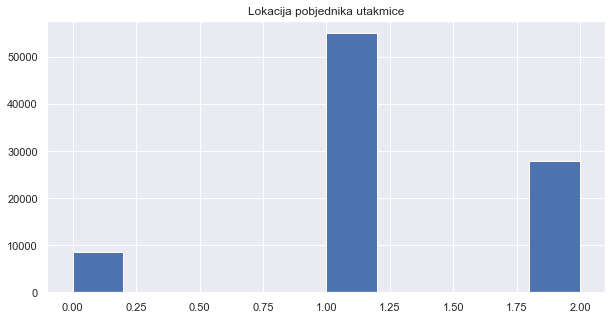

In [98]:
plt.hist(reg_season_results.wloc)
plt.title("Lokacija pobjednika utakmice")
plt.show()
#2 - pobjeda gosta, 1-pobjeda domaćina, 0-pobjeda na neutralnom terenu

Sljedeća zanimljiva analiza je o prosječnom broju postignutih poena tijekom godina. Iz toga možemo zaključiti postoji li trend, odnosno igra li se s godinama slabija ili jača obrana. Također, ovaj graf će nam koristiti za usporedbu o broju postignutih poena između regularne sezone i završnog turnira.

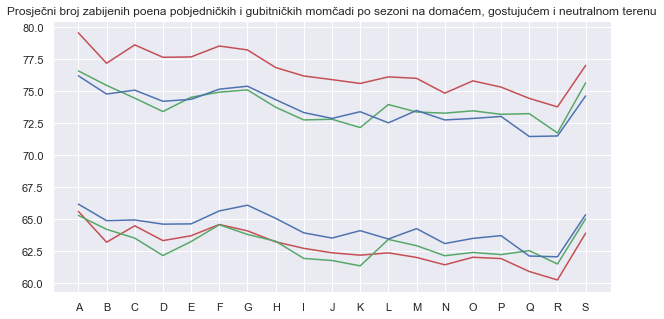

In [99]:
s = 'ABCDEFGHIJKLMNOPQRS'
season = []
avg_win_home = []
avg_win_away = []
avg_win_neutral = []
avg_lose_home = []
avg_lose_away = []
avg_lose_neutral = []
#students.groupby('grade').size()
for i in s:
    season.append(i)
    tmp = reg_season_results[(reg_season_results.season == i) & (reg_season_results.wloc == 1)]
    avg_win_home.append(tmp.wscore.mean())
    avg_lose_home.append(tmp.lscore.mean())
    tmpp = reg_season_results[(reg_season_results.season == i) & (reg_season_results.wloc == 0)]
    avg_win_neutral.append(tmpp.wscore.mean())
    avg_lose_neutral.append(tmpp.lscore.mean())
    tmppp = reg_season_results[(reg_season_results.season == i) & (reg_season_results.wloc == 2)]
    avg_win_away.append(tmppp.wscore.mean())
    avg_lose_away.append(tmppp.lscore.mean())

plt.plot(season, avg_win_home, color = 'r')
plt.plot(season, avg_lose_home, color = 'r')
plt.plot(season, avg_win_neutral, color = 'g')
plt.plot(season, avg_lose_neutral, color = 'g')
plt.plot(season, avg_win_away, color = 'b')
plt.plot(season, avg_lose_away, color = 'b')
plt.title("Prosječni broj zabijenih poena pobjedničkih i gubitničkih momčadi po sezoni na domaćem, gostujućem i neutralnom terenu")
plt.show()

Iz grafa se može iščitati da pobjedničke momčadi zabijaju više poena na domaćem terenu što je nekako i očekivano. Kod broja poena poraženih momčadi ne vidimo značajnu razliku. Osim toga, može se primjetiti da se s godinama smanjuje broj postignutih poena kod pobjedničkih momčadi, ali vidimo i porast broja koševa u sezoni S, i to u svim kategorijama.

Sljedeće što se može napraviti je prikaz konačne tablice po sezonama. Zbog lakšeg prikaza, za svaku sezonu će se prikazati jedna tablica sa svim momčadima, iako bi se mogla napraviti tablica za svaku diviziju. Funkcija getTablePerSeason kao argument prima sezonu za koju želimo ispisati tablicu, a vraća tablicu za izabranu sezonu. Zatim ću funkciju iskoristiti da prikažem najbolje 3 momčadi u svakoj sezoni.

In [100]:
def getTablePerSeason(season):
    tmp = reg_season_results[reg_season_results.season == season]
    teams_score = {}
    t = set()
    w = tmp['wteam'].tolist()
    l = tmp['lteam'].tolist()
    for i in w:
        t.add(i)
    for i in l:
        t.add(i)
    #print(teams)
    for i in t:
        tmpp = teams[teams.id == i]
        name = tmpp['name'].tolist()[0]
        teams_score.update({name: len(tmp[tmp.wteam == i])/(len(tmp[tmp.wteam == i]) + len(tmp[tmp.lteam == i]))})
    t = list(zip(teams_score.keys(), teams_score.values()))
    frame = pd.DataFrame(t, columns = ['Momčad', 'Postotak pobjeda'])
    return frame

In [164]:
season = 'ABCDEFGHIJKLMOPQRS'
for i in seasons:
    frame = getTablePerSeason(i)
    frame = frame.sort_values(by=['Postotak pobjeda'], ascending = False) #tablicu želimo sortirati tako da su najuspješnije momčadi na vrhu
    print(frame.head(3))
    print("----------------------------")

            Momčad  Postotak pobjeda
130  Massachusetts          0.968750
241     Texas Tech          0.965517
41     Connecticut          0.937500
----------------------------
             Momčad  Postotak pobjeda
116          Kansas          0.968750
45   Col Charleston          0.925926
149       Minnesota          0.896552
----------------------------
             Momčad  Postotak pobjeda
203       Princeton          0.961538
118          Kansas          0.916667
179  North Carolina          0.909091
----------------------------
            Momčad  Postotak pobjeda
69            Duke          0.969697
52     Connecticut          0.933333
47  Col Charleston          0.925926
----------------------------
         Momčad  Postotak pobjeda
43   Cincinnati          0.903226
250    Stanford          0.892857
269       Tulsa          0.878788
----------------------------
         Momčad  Postotak pobjeda
255    Stanford          0.931034
71         Duke          0.878788
97   Georgia St  

Osim tablice, možemo prikazati i omjer pobjeda i poraza za odabranu momčad u odabranoj sezoni. Funkcija getTeamWinRatio kao argumente prima sezonu i id momčadi za koju želimo dobiti omjer. Funkcija vraća broj pobjeda i poraza.

In [102]:
def getTeamWinRatio(season, team_id):
    w = len(reg_season_results[(reg_season_results.season == season) & (reg_season_results.wteam == team_id)])
    l = len(reg_season_results[(reg_season_results.season == season) & (reg_season_results.lteam == team_id)])
    return w,l

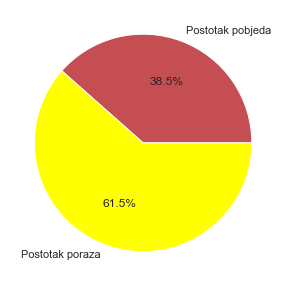

In [103]:
labels = ['Postotak pobjeda', 'Postotak poraza']
w,l = getTeamWinRatio('A', 531)
values = []
values.append(w)
values.append(l)
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', colors = ['r', 'yellow'])
plt.show()

Možemo izračunati i korelaciju između svaka dva para značajki u tablici. S obzirom da se korelacijski faktor može računati samo s numeričkim podacima, moramo napraviti tablicu bez značajke season koja nije numerička. Rezultate ću prikazati toplinskom mapom

In [104]:
X = reg_season_results.loc[:,~reg_season_results.columns.isin(['season'])]
X

,daynum,wteam,wscore,lteam,lscore,wloc
0,16,511,91,647,57,1
1,16,515,75,812,67,1
2,16,606,87,658,67,1
3,16,670,73,573,65,1
4,16,721,99,632,68,1
...,...,...,...,...,...,...
91219,132,592,61,640,60,0
91220,132,671,69,670,55,0
91221,132,779,65,825,61,0
91222,132,811,82,605,81,0


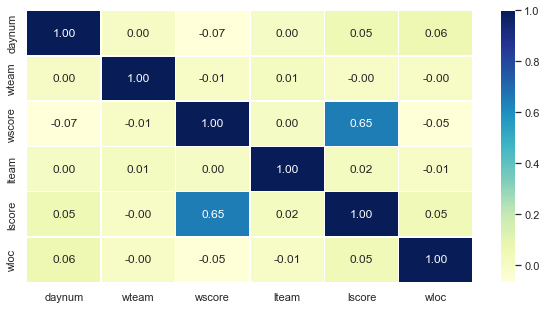

In [105]:
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.show()

Iz toplinske mape možemo vidjeti da je korelacija između značajki slaba, osim za značajke wscore i lscore što je i očekivano. Ako je broj poena velik, vjerojatno će obje momčadi postići više poena od prosjeka. Naravno da postoje utakmice u kojima je koš-razlika velika pa je onda lscore značajnije manji od wscore.

# seasons

Sljedeća tablica koju ću obraditi je tablica seasons koja prikazuje kad je počela i završila svaka sezona, te na koje regije, odnosno divizije je liga bila podijeljena. 

In [106]:
seasons

,season,years,dayzero,regionW,regionX,regionY,regionZ
0,A,1995-1996,10/30/1995,East,Midwest,Southeast,West
1,B,1996-1997,10/28/1996,East,Southeast,Midwest,West
2,C,1997-1998,10/27/1997,East,West,Midwest,South
3,D,1998-1999,10/26/1998,East,Midwest,South,West
4,E,1999-2000,11/01/1999,Midwest,West,East,South
5,F,2000-2001,10/30/2000,East,West,Midwest,South
6,G,2001-2002,10/29/2001,East,Midwest,South,West
7,H,2002-2003,11/04/2002,East,South,Midwest,West
8,I,2003-2004,11/03/2003,Atlanta,Phoenix,EastRutherford,StLouis
9,J,2004-2005,11/01/2004,Albuquerque,Chicago,Austin,Syracuse


Napravit ću deskriptivnu analizu danih podataka. S obzirom na to da podaci nisu numerički i nema smisla da ih pretvaramo u nemričke, analiza ove tablice neće biti dugačka.

In [107]:
seasons.describe()

,season,years,dayzero,regionW,regionX,regionY,regionZ
count,19,19,19,19,19,19,19
unique,19,19,19,4,7,7,6
top,A,1995-1996,10/30/1995,East,South,Midwest,West
freq,1,1,1,15,6,9,12


In [108]:
seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   season   19 non-null     object
 1   years    19 non-null     object
 2   dayzero  19 non-null     object
 3   regionW  19 non-null     object
 4   regionX  19 non-null     object
 5   regionY  19 non-null     object
 6   regionZ  19 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


# teams

Sljedeća tablica je tablica s momčadima koja sadrži dvije značajke: id momčadi i naziv momčadi. Tablica nam je korisna jer je to zapravo popis svih momčadi koje su sudjelovale u ligi te je preko atributa id povezana s ostalim tablicama (ne svim).

In [109]:
teams

,id,name
0,501,Abilene Chr
1,502,Air Force
2,503,Akron
3,504,Alabama
4,505,Alabama A&M
...,...,...
351,852,Wyoming
352,853,Xavier
353,854,Yale
354,855,Youngstown St


S obzirom na to da tablica ne sadrži numeričke značajke korisne za analizu (id je numerička značajka, ali monotono rastuća pa nema koristi od njene analize), analiza ove tablice će se svesti na generalni opis i informacije.

In [110]:
teams.describe()

,id
count,356.000000
mean,678.500000
std,102.912584
min,501.000000
25%,589.750000
50%,678.500000
75%,767.250000
max,856.000000


In [111]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      356 non-null    int64 
 1   name    356 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.7+ KB


# tourney_results

Sljedeća tablica je tablica tourney_results. Ona prikazuje rezultate završnog turnira za svaku sezonu. Analiza ove tablice će u početku biti slična analizi tablice s rezultatima regularne sezone, pa neću opisivati deskriptivnu statistiku, te razloge za izbacivanje značajke numot iz tablice

In [112]:
tourney_results

,season,daynum,wteam,wscore,lteam,lscore,numot
0,A,136,515,86,729,80,NaN
1,A,136,559,68,555,59,NaN
2,A,136,576,75,666,63,NaN
3,A,136,581,75,577,60,NaN
4,A,136,604,81,551,74,NaN
...,...,...,...,...,...,...,...
1151,R,146,651,85,577,63,0.0
1152,R,146,670,79,592,59,0.0
1153,R,152,651,72,846,68,0.0
1154,R,152,670,61,786,56,0.0


In [113]:
tourney_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   season  1156 non-null   object 
 1   daynum  1156 non-null   int64  
 2   wteam   1156 non-null   int64  
 3   wscore  1156 non-null   int64  
 4   lteam   1156 non-null   int64  
 5   lscore  1156 non-null   int64  
 6   numot   585 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 63.3+ KB


In [114]:
tourney_results.describe()

,daynum,wteam,wscore,lteam,lscore,numot
count,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,585.000000
mean,139.143599,682.515571,75.549308,686.699827,63.667820,0.075214
std,4.213580,98.684397,10.941410,103.201450,10.567058,0.311565
min,134.000000,504.000000,43.000000,502.000000,29.000000,0.000000
25%,136.000000,606.000000,68.000000,603.750000,57.000000,0.000000
50%,137.000000,671.000000,75.000000,681.500000,63.000000,0.000000
75%,139.000000,783.000000,82.000000,783.000000,70.000000,0.000000
max,154.000000,853.000000,121.000000,853.000000,105.000000,2.000000


In [115]:
tourney_results.nunique()

season     18
daynum     12
wteam     155
wscore     67
lteam     258
lscore     66
numot       3
dtype: int64

In [116]:
tourney_results.isna().sum()

season      0
daynum      0
wteam       0
wscore      0
lteam       0
lscore      0
numot     571
dtype: int64

In [117]:
tourney_results.drop(('numot'), axis=1, inplace=True)

In [118]:
tourney_results.head()

,season,daynum,wteam,wscore,lteam,lscore
0,A,136,515,86,729,80
1,A,136,559,68,555,59
2,A,136,576,75,666,63
3,A,136,581,75,577,60
4,A,136,604,81,551,74


In [119]:
tourney_results[tourney_results.wscore < 50]

,season,daynum,wteam,wscore,lteam,lscore
10,A,136,736,43,810,41
214,D,137,678,43,849,32
266,E,136,821,48,780,45
461,H,137,535,47,675,46


In [120]:
tourney_results[tourney_results.lscore < 40]

,season,daynum,wteam,wscore,lteam,lscore
214,D,137,678,43,849,32
259,E,136,671,65,826,38
341,F,137,671,69,506,35
382,G,136,577,84,848,37
774,M,136,810,70,685,29
1106,R,136,786,81,680,34
1149,R,145,786,55,660,39


U potrazi za stršećim vrijednostima, pogledali smo broj zapisa u kojima je pobjednički tim postigao manje od 50 poena, te one u kojima je poraženi tim postigao manje od 40 poena. Iz tablice rezultata regularne sezone smo mogli vidjeti da su takve utakmice moguće pa niti ovdje neću ništa napraviti s tim zapisima. Maksimalan broj postignutih poena je 121 što je u košarci moguće, pa niti s te strane nema stršećih vrijednosti.

Sad slijedi grafički prikaz podataka. Prvo ću pomoću box plot dijagrama prikazati značajke lscore i wscore. Box plot dijagram nam prikazuje distribuciju značajke, odnosno minimum, maksimum, srednju vrijednost te gornji i donji kvartil.

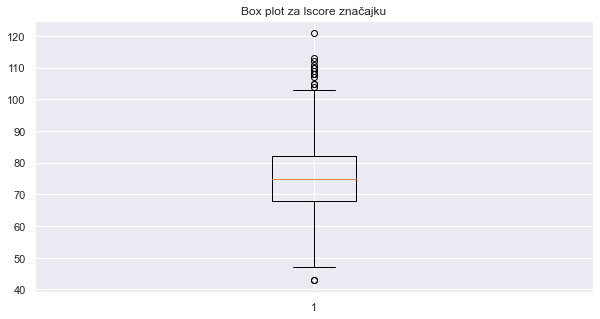

In [121]:
plt.boxplot(tourney_results.wscore)
plt.title('Box plot za lscore značajku')
plt.show()

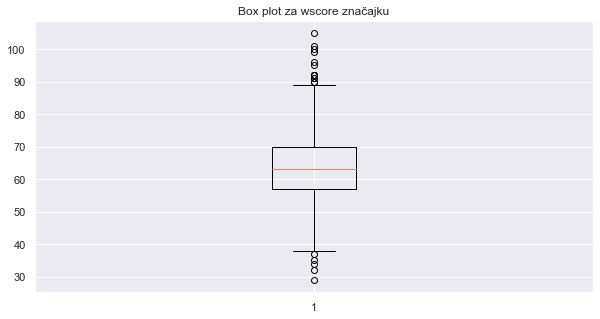

In [122]:
plt.boxplot(tourney_results.lscore)
plt.title('Box plot za wscore značajku')
plt.show()

Sljedeći korak je prikaz prosječnog broja poena po sezonama.

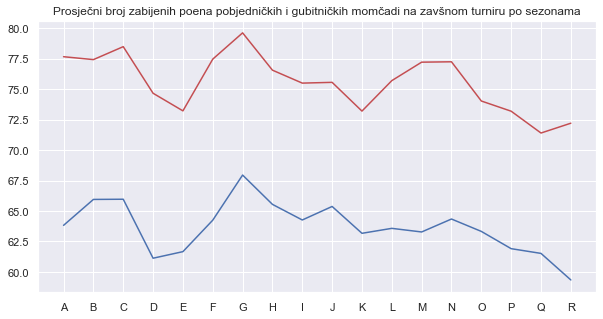

In [123]:
s = 'ABCDEFGHIJKLMNOPQR'
season = []
avg_win = []
avg_lose = []
avg_win_reg = []
avg_lose_reg = []
#students.groupby('grade').size()
for i in s:
    season.append(i)
    tmp = tourney_results[(tourney_results.season == i)]
    tmp_reg = reg_season_results[(reg_season_results.season == i)]
    avg_win.append(tmp.wscore.mean())
    avg_lose.append(tmp.lscore.mean())
    avg_win_reg.append(tmp_reg.wscore.mean())
    avg_lose_reg.append(tmp_reg.lscore.mean())

plt.plot(season, avg_win, color = 'r')
plt.plot(season, avg_lose, color = 'b')
plt.title("Prosječni broj zabijenih poena pobjedničkih i gubitničkih momčadi na zavšnom turniru po sezonama")
plt.show()

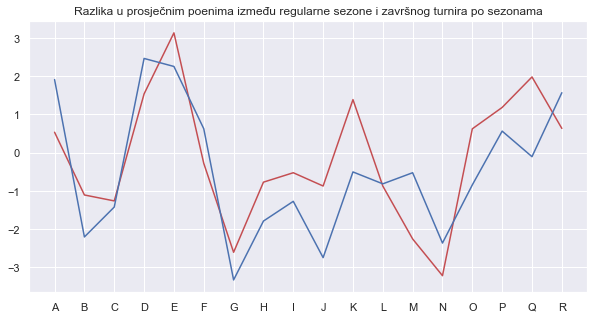

In [124]:
diff_win = []
diff_lose = []
for i in range(len(avg_win)):
    diff_win.append(avg_win_reg[i] - avg_win[i])
    diff_lose.append(avg_lose_reg[i] - avg_lose[i])
    
plt.plot(season, diff_win, color = 'r')
plt.plot(season, diff_lose, color = 'b')
plt.title("Razlika u prosječnim poenima između regularne sezone i završnog turnira po sezonama")
plt.show()

Iz grafa se može iščitati da prosječni broj poena varira od sezone do sezone, a u usporedbi s istim grafom za regularnu sezonu vidimo da nema neke razlike u broju poena. Odnosno, u nekim sezonama se zabija više poena u regularnom dijelu, a u nekima na završnom turniru.

In [125]:
def getTeams(): #vraća sve timove koji su sudjelovali na završnim turnirima
    tmp = set()
    w = tourney_results['wteam'].tolist()
    l = tourney_results['wteam'].tolist()
    for i in w:
        tmp.add(i)
    for i in l:
        tmp.add(i)
    teams = {}
    for i in tmp:
        teams.update({i:0})
    return teams

In [126]:
def getWinnerPerSeason(season): #vraća pobjednika za izabranu sezonu
    tmp = tourney_results[tourney_results.season == season]
    w = tmp['wteam'].tolist()
    return w[-1]

In [127]:
seasons = 'ABCDEFGHIJKLMNOPQR'
for i in seasons:
    winner_id = getWinnerPerSeason(i)
    tmp = teams[teams.id == winner_id]
    winner = tmp['name'].tolist()[0]
    print(winner)

Kentucky
Arizona
Kentucky
Connecticut
Michigan St
Duke
Maryland
Syracuse
Connecticut
North Carolina
Florida
Florida
Kansas
North Carolina
Duke
Connecticut
Kentucky
Louisville


Sad kad imamo funkciju koja vraća pobjednike po sezoni, možemo napraviti graf najuspješnijih momčadi (momčadi s najviše osvojenih turnira).

In [128]:
seasons = 'ABCDEFGHIJKLMNOPQR'
t = getTeams()
for i in seasons:
    winner = getWinnerPerSeason(i)
    t[winner] += 1


In [129]:
winners = {}
for i in t.keys():
    if t[i] > 0:
        winners.update({i: t[i]})
winners

{559: 3,
 577: 2,
 592: 2,
 636: 1,
 640: 3,
 651: 1,
 662: 1,
 671: 1,
 708: 2,
 786: 1,
 511: 1}

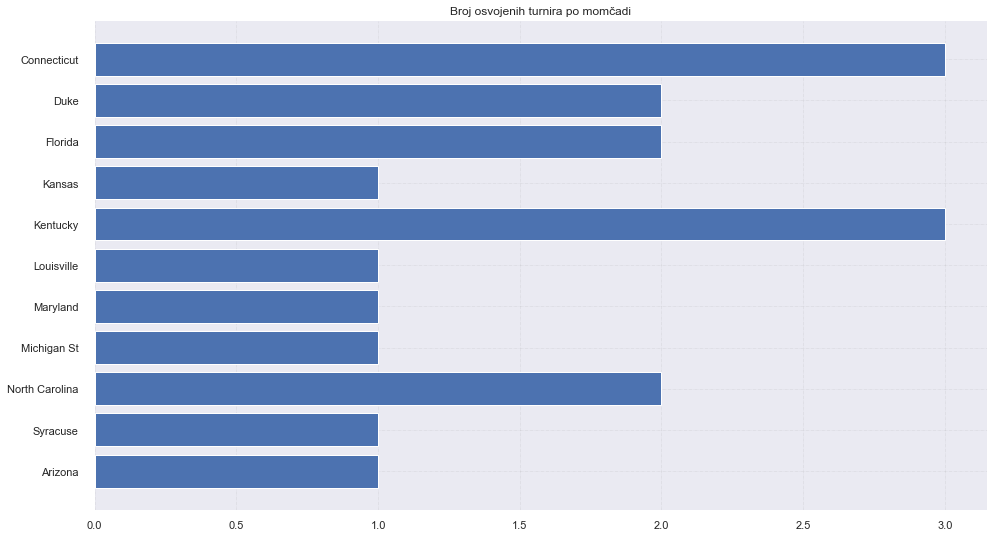

In [130]:
x = list(winners.keys())
y = list(winners.values())

names = []
for i in x:
    tmp = teams[teams.id == i]
    names.append(tmp['name'].tolist()[0])

fig, ax = plt.subplots(figsize =(16, 9))
 
ax.barh(names, y)
 
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
  
ax.invert_yaxis()

plt.title("Broj osvojenih turnira po momčadi")
    
plt.show()

Iz gornjeg grafa možemo vidjeti da je dosta momčadi osvajalo turnir (ukupno 11 momčadi u 18 godina) što nam pokazuje da su momčadi izjednačene te da niti jedna ne odskače previše od konkurencije. Ipak, najtrofejnije momčadi u ovih 18 godina su Connecticut i Kentucky s 3 naslova. Iz ispisa prvaka po godinama možemo vidjeti da je Kentucky uzeo 2 naslova u prve 3 godine, a zatim je na treću titulu morao čekati 14 godina. Također, možemo napraviti usporedbu između pobjednika regularnog dijela sezone i pobjednika turnira te vidjeti da ima momčadi koje su bile prve u regularnom dijelu (Murray St, Gonzaga), a neke čak i 2 puta (Memphis), a da nemaju naslov s turnira. S druge strane, postoje momčadi koje imaju naslove s turnira, a niti jednom nisu bile prve u regularnom dijelu (Florida i North Carolina čak 2 puta).

In [131]:
X = tourney_results.loc[:,~tourney_results.columns.isin(['season'])]
X

,daynum,wteam,wscore,lteam,lscore
0,136,515,86,729,80
1,136,559,68,555,59
2,136,576,75,666,63
3,136,581,75,577,60
4,136,604,81,551,74
...,...,...,...,...,...
1151,146,651,85,577,63
1152,146,670,79,592,59
1153,152,651,72,846,68
1154,152,670,61,786,56


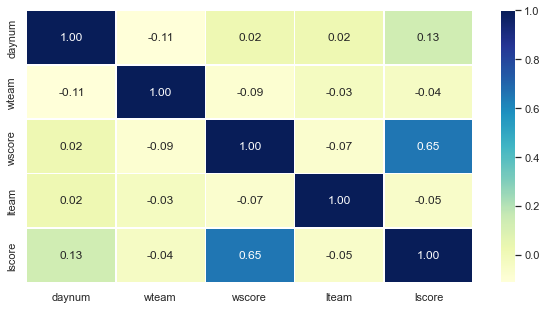

In [132]:
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.show()

# seeds

Seeds je tablica koja nam otkriva seed po sezonama za svaku od 64 momčadi koja sudjeluje u završnom NCAA turniru. Tablica nema numeričkih podataka (osim id tima kojeg nema smisla analizirati) pa nema smisla niti vizualizacija podataka iz tablice.

In [133]:
seeds

,season,seed,team
0,A,W01,663
1,A,W02,603
2,A,W03,796
3,A,W04,660
4,A,W05,729
...,...,...,...
1237,S,Z12,689
1238,S,Z13,702
1239,S,Z14,811
1240,S,Z15,509


In [134]:
seeds.describe()

,team
count,1242.000000
mean,685.844605
std,103.133122
min,502.000000
25%,603.000000
50%,680.000000
75%,783.000000
max,853.000000


In [135]:
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   season  1242 non-null   object
 1   seed    1242 non-null   object
 2   team    1242 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 29.2+ KB


In [136]:
seeds.nunique()

season     19
seed       86
team      262
dtype: int64

In [137]:
seeds.isna().sum()

season    0
seed      0
team      0
dtype: int64

# slots

Podaci iz slots tablice nam otkrivaju kako se slaže ždrijeb momčadi, ovisno o seedu svakog tima. Tablica nema numeričkih podataka pa nema smisla niti vizualizacija podataka iz tablice.

In [138]:
slots

,season,slot,strongseed,weakseed
0,A,R1W1,W01,W16
1,A,R1W2,W02,W15
2,A,R1W3,W03,W14
3,A,R1W4,W04,W13
4,A,R1W5,W05,W12
...,...,...,...,...
1218,S,R4Y1,R3Y1,R3Y2
1219,S,R4Z1,R3Z1,R3Z2
1220,S,R5WX,R4W1,R4X1
1221,S,R5YZ,R4Y1,R4Z1


In [139]:
slots.describe()

,season,slot,strongseed,weakseed
count,1223,1223,1223,1223
unique,19,74,74,74
top,S,R1W1,W01,W16
freq,67,19,19,19


In [140]:
slots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      1223 non-null   object
 1   slot        1223 non-null   object
 2   strongseed  1223 non-null   object
 3   weakseed    1223 non-null   object
dtypes: object(4)
memory usage: 38.3+ KB


In [141]:
slots.isna().sum()

season        0
slot          0
strongseed    0
weakseed      0
dtype: int64

## 2. dio projekta - replikacija rezultata

Drugi dio projekta sastoji se od predikcija pobjednika utakmica. Za taj zadatak koristio sam 3 dodatne tablice. Reg_season_detailed, tourney_detailed i ordinals. Prva sadrži detaljne rezultate svih utakmica regularne sezone (podaci o broju asistencija, blokadama, poenima i ostalim podacima relevantnim za analizu košarkaških utakmica). Druga tablica sadrži iste podatke, ali ne za regularnu sezonu, već za završni turnir. Treća tablica nam je bitna zato što sadrži RPI rang za svaku momčad tijekom godina.

In [142]:
reg_season_detailed = pd.read_csv("regular_season_detailed.csv")
tourney_detailed = pd.read_csv("tourney_detailed.csv")
ordinals = pd.read_csv("ordinals.csv")

In [143]:
reg_season_detailed

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107629,2023,132,1104,82,1401,63,N,0,27,66,...,15,20,24,17,20,6,13,5,2,21
107630,2023,132,1272,75,1222,65,A,0,27,53,...,25,19,28,22,20,11,10,5,4,19
107631,2023,132,1343,74,1463,65,H,0,23,57,...,22,13,19,6,25,12,10,3,7,20
107632,2023,132,1345,67,1336,65,N,0,24,62,...,23,14,15,4,27,14,10,4,2,20


S obzirom na to da je deskriptivna analiza bila prvi dio projekta, sada se neću previše zadržavati na njoj. Provjerit ću samo ima li nedostajućih vrijednosti u bilo kojoj od tri tablice.

In [144]:
reg_season_detailed.isna().sum()

Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
WFGM       0
WFGA       0
WFGM3      0
WFGA3      0
WFTM       0
WFTA       0
WOR        0
WDR        0
WAst       0
WTO        0
WStl       0
WBlk       0
WPF        0
LFGM       0
LFGA       0
LFGM3      0
LFGA3      0
LFTM       0
LFTA       0
LOR        0
LDR        0
LAst       0
LTO        0
LStl       0
LBlk       0
LPF        0
dtype: int64

In [145]:
ordinals.isna().sum()

Season           0
RankingDayNum    0
SystemName       0
TeamID           0
OrdinalRank      0
dtype: int64

In [146]:
tourney_detailed.isna().sum()

Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
WFGM       0
WFGA       0
WFGM3      0
WFGA3      0
WFTM       0
WFTA       0
WOR        0
WDR        0
WAst       0
WTO        0
WStl       0
WBlk       0
WPF        0
LFGM       0
LFGA       0
LFGM3      0
LFGA3      0
LFTM       0
LFTA       0
LOR        0
LDR        0
LAst       0
LTO        0
LStl       0
LBlk       0
LPF        0
dtype: int64

In [147]:
ordinals = ordinals[(ordinals.Season >= 2011) & (ordinals.Season <= 2014)]

In [148]:
ords = {}
t = set()
w = ordinals['TeamID'].tolist()
for i in w:
    t.add(i)

for i in t:
   
    tmp = ordinals[ordinals['TeamID']== i]
    v = sum(tmp['OrdinalRank'])/len(tmp['OrdinalRank'])
    ords.update({i: v})
    
t = list(zip(ords.keys(), ords.values()))
rframe = pd.DataFrame(t, columns = ['TeamID', 'Prosječni rang'])
rframe

,TeamID,Prosječni rang
0,1101,331.861004
1,1102,155.212392
2,1103,96.761150
3,1104,73.719448
4,1105,315.118290
...,...,...
347,1460,159.184707
348,1461,115.390718
349,1462,57.179680
350,1463,185.285005


Dobivena tablica u ćeliji iznad nam je prikaz prosječnog RPI ranga za svaku momčad tijekom godina.

In [149]:
s = ['FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF']

tmp = reg_season_detailed[(reg_season_detailed.Season >= 2011) & (reg_season_detailed.Season <= 2014)]
tmpp = tourney_detailed[(tourney_detailed.Season >= 2011) & (tourney_detailed.Season <= 2013)]

Tablica ispod će biti prikaz spojenih tablica završnog turnira i regularne sezone za odabrane godine. Za ovu analizu koristio sam rezultate regularne sezone u sezonama [2011, 2014], te turnira u sezonama [2011,2013).
Tako sam izabrao jer su te godine analizirali u članku čije rezultate trebamo replicirati. Predikcije ću kasnije raditi za utakmice s turnira 2014. godine.

In [150]:
tmp = pd.concat([tmp,tmpp], axis=0)
tmp

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
39337,2011,7,1228,79,1414,65,H,0,29,58,...,20,14,22,11,26,12,14,7,1,21
39338,2011,7,1268,105,1370,76,H,0,35,62,...,16,17,22,18,16,11,27,18,1,31
39339,2011,7,1338,83,1348,75,H,0,29,64,...,32,13,16,10,21,16,17,7,6,25
39340,2011,7,1400,83,1298,52,H,0,30,59,...,23,10,18,8,22,8,16,5,5,24
39341,2011,9,1228,84,1405,45,H,0,37,64,...,12,10,19,6,17,9,23,6,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,2013,146,1257,85,1181,63,N,0,29,55,...,16,21,28,11,20,11,12,4,2,23
709,2013,146,1276,79,1196,59,N,0,30,65,...,10,11,17,9,27,13,15,7,3,11
710,2013,152,1257,72,1455,68,N,0,22,49,...,20,18,24,14,22,13,11,5,1,20
711,2013,152,1276,61,1393,56,N,0,21,53,...,14,7,11,10,23,13,10,7,4,19


Tablica ispod nam je prikaz postotka pobjeda za svaki tim u odabranim sezonama.

In [151]:

teams_score = {}
t = set()
w = tmp['WTeamID'].tolist()
l = tmp['LTeamID'].tolist()
for i in w:
    t.add(i)
for i in l:
    t.add(i)

for i in t:
    teams_score.update({i: (len(tmp[tmp.WTeamID == i])/(len(tmp[tmp.WTeamID == i]) + len(tmp[tmp.LTeamID == i])))})
t = list(zip(teams_score.keys(), teams_score.values()))
frame = pd.DataFrame(t, columns = ['Momčad', 'Postotak pobjeda'])
frame

,Momčad,Postotak pobjeda
0,1101,0.095238
1,1102,0.450450
2,1103,0.674242
3,1104,0.578125
4,1105,0.333333
...,...,...
347,1460,0.531746
348,1461,0.500000
349,1462,0.643939
350,1463,0.522936


Tablica ispod je spoj tablica s prosječnim rangom za svaku momčad, te postotku pobjeda za svaku momčad

In [152]:
frame = pd.concat([frame, rframe], axis = 1)
frame

,Momčad,Postotak pobjeda,TeamID,Prosječni rang
0,1101,0.095238,1101,331.861004
1,1102,0.450450,1102,155.212392
2,1103,0.674242,1103,96.761150
3,1104,0.578125,1104,73.719448
4,1105,0.333333,1105,315.118290
...,...,...,...,...
347,1460,0.531746,1460,159.184707
348,1461,0.500000,1461,115.390718
349,1462,0.643939,1462,57.179680
350,1463,0.522936,1463,185.285005


Sada ću ukratko objasniti ideju kojom sam se vodio za analizu podataka. S obzirom na to da ćemo za predikciju koristiti algoritam logističke regresije, trebaju nam vrijednosti ulaza i izlaza na kojima ćemo trenirati model. Za vrijednosti izlaza za svaki tim sam odlučio postaviti njihov postotak pobjeda. Da bih dobio ulaz za model, moram izračunati prosjek razlike za svaku značajku za svaku momčad. Da pojasnim, ako npr. promatramo momčad s ID = 1100 i značajku o broju pogođenih trica (ovo sam koristio samo za primjer, općenito radim sa svim timovima i značajkama). Tada ću pogledati sve zapise u kojima je tim s ID = 1100 pobijedio te izračunati razliku između broja zabijenih trica između tog tima i poraženog tima. Isto to ću napraviti za sve zapise u kojima je tim s ID = 1100 poražen. To ću spremiti u varijablu res, te ću je zatim podijeliti s brojem zapisa gdje je igrao tim s ID = 1100 (to radim da bih eliminirao utjecaj broja utakmica na rezultat, neki timovi su odigrali primjetno više utakmica od drugih). Time sam dobio značajku diffFGA3 za tim s ID = 1100, odnosno prosjek razlike zabijenih trica između tog tima i tima protiv kojeg su igrali. Isti postupak ponavljam za sve timove i značajke.  

In [153]:
ts = frame['Momčad'].tolist()
diffs = []
cnt = 0
for i in range(frame.shape[0]):
    diffs.append([])
for i in ts:
    x = tmp[(tmp.WTeamID == i)]
    xx = tmp[(tmp.LTeamID == i)]
    for j in s:
        win = 'W'+j
        lose = 'L'+j
        res = 0
        res += ((x[win].sum() - x[lose].sum())/x.shape[0])
        
        res += ((xx[lose].sum() - xx[win].sum())/xx.shape[0])
        
        diffs[cnt].append(res)
    
    cnt += 1
    

In [154]:
diffs_names = []
for i in s:
    diffs_names.append('diff'+i)
f = pd.DataFrame(diffs, columns = diffs_names)
f

,diffFGM,diffFGA,diffFGM3,diffFGA3,diffFTM,diffFTA,diffOR,diffDR,diffAst,diffTO,diffStl,diffBlk,diffPF
0,-11.105263,-7.657895,1.184211,1.842105,7.052632,1.157895,-5.315789,-1.921053,-8.842105,2.710526,-0.026316,-3.447368,-1.263158
1,0.052459,-6.531803,-0.281639,-4.434754,-1.691803,-2.472131,-7.469508,-1.032131,1.823934,-0.468525,-0.355082,-1.627869,-0.857705
2,0.287170,0.875359,2.985890,7.736347,-2.647243,-1.457539,0.682519,-0.918474,1.095114,0.303632,-0.176378,1.935981,0.668931
3,3.624124,0.667167,-0.809810,-2.879880,-1.391391,-2.407407,-1.427427,1.906907,0.767768,-1.353353,3.704204,1.061061,3.583584
4,-0.902778,0.166667,1.083333,4.027778,-3.375000,-4.958333,-0.583333,-0.944444,2.513889,1.152778,-1.236111,1.805556,1.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0.955477,5.930686,1.100683,0.952441,-2.464204,-4.558816,-1.968884,-5.796104,0.386036,-5.716418,2.910448,-3.240071,2.676195
348,-0.932203,-4.949153,0.135593,1.711864,3.440678,5.440678,-5.135593,-2.288136,1.915254,-2.305085,1.915254,1.847458,-4.000000
349,2.736170,-1.980976,-3.593492,-10.189487,1.277096,2.757196,1.137422,4.399249,-1.726658,1.141176,-0.449061,-1.609762,-1.474343
350,-2.969636,-2.851215,-1.178812,-0.193320,4.828273,6.012821,2.774291,1.631579,-0.364710,2.578273,-1.831984,0.089406,-3.284413


In [155]:
frame = frame.drop(['TeamID'], axis = 1)
frame

,Momčad,Postotak pobjeda,Prosječni rang
0,1101,0.095238,331.861004
1,1102,0.450450,155.212392
2,1103,0.674242,96.761150
3,1104,0.578125,73.719448
4,1105,0.333333,315.118290
...,...,...,...
347,1460,0.531746,159.184707
348,1461,0.500000,115.390718
349,1462,0.643939,57.179680
350,1463,0.522936,185.285005


Tablica ispod je prikaz dosadašnjeg dijela obrade podataka. Ona sadržava zapise za sve momčadi, te njihov postotak pobjeda, prosječni rang i prosječne razlike za svaku značajku

In [156]:
diff = pd.concat([frame,f], axis=1)
diff = diff.sort_values(by=['Postotak pobjeda'], ascending = False)
diff

,Momčad,Postotak pobjeda,Prosječni rang,diffFGM,diffFGA,diffFGM3,diffFGA3,diffFTM,diffFTA,diffOR,diffDR,diffAst,diffTO,diffStl,diffBlk,diffPF
135,1242,0.829932,6.724558,5.876393,0.897377,-2.093770,-3.554426,-0.308197,-0.141311,1.617049,6.394098,4.252459,1.675738,0.486557,3.100656,1.227869
342,1455,0.829630,25.883121,4.437112,6.281444,1.432842,4.883152,-0.596661,-2.450311,6.342780,5.074534,4.174301,0.989907,1.631599,1.987578,1.208075
283,1393,0.819444,8.189099,5.491525,7.180574,-2.248370,-5.602347,-1.676662,-1.307692,0.955020,-1.130378,-2.475228,-5.181877,3.948501,5.200130,-0.149283
75,1181,0.815603,7.247564,0.448829,4.366221,5.719732,15.807692,0.905017,-0.725418,-0.288294,-2.996656,1.695318,-3.860535,2.063880,0.234783,0.861538
217,1326,0.809524,9.155793,3.228992,5.573529,-1.285714,-1.750000,6.102941,9.373950,3.783613,0.014706,2.943277,-4.922269,4.434874,0.149160,-2.462185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1212,0.172414,339.325798,-7.527083,-6.993750,-1.245833,-1.287500,1.456250,-0.083333,-2.125000,-0.779167,-4.668750,4.579167,-3.685417,-1.960417,0.685417
23,1127,0.157025,330.204305,-4.233746,-6.865841,-0.796182,-4.708978,2.379257,2.808050,-2.352425,-0.668215,-5.021672,2.907637,-1.031476,0.319917,-0.978844
137,1244,0.134454,323.416087,-5.450243,-3.635316,1.149879,2.175364,1.155947,2.425364,-0.952063,-3.357403,-2.955097,2.030340,-1.478155,-1.423544,-1.117112
0,1101,0.095238,331.861004,-11.105263,-7.657895,1.184211,1.842105,7.052632,1.157895,-5.315789,-1.921053,-8.842105,2.710526,-0.026316,-3.447368,-1.263158


Sljedeći korak u obradi je prikaz korelacije značajki. Ono što me najviše zanima je korelacija značajki s postotkom pobjeda jer ću na temelju toga vidjeti koje značajke najviše utječu na postotak pobjeda, te odabrati najboljih (najdiskriminativnijih) 6.

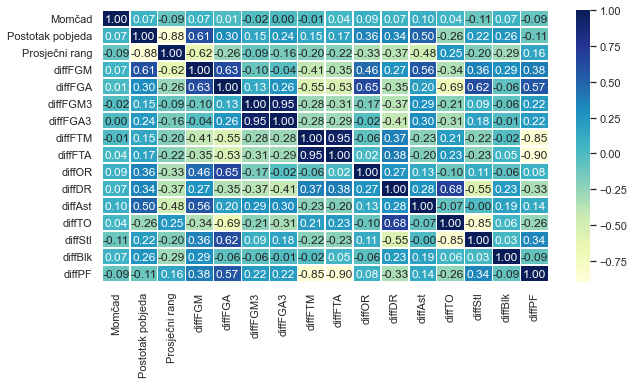

In [157]:
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(diff.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.show()

Iz prikaza korelacija vidimo da su 6 najdiskriminativnijih značajki za podatke kojima raspolažemo: diffFGM, diffFTA, diffOR, diffDR, diffAst te Prosječni rang. Odnosno, razlika u broju zabijenih koševa iz igre, razlika zarađenih slobodnih bacanja, razlike u defanzivnim i ofanzivnim skokovima, razlika asistencija te prosječni rang.

In [158]:
six = ['diffFGM', 'diffFTA', 'diffOR', 'diffDR', 'diffAst', 'Prosječni rang']
y = np.array(diff["Postotak pobjeda"].tolist())
x = []
for i in range(6):
    x.append(diff[six[i]].tolist())

Sljedeće što ću napraviti je pokrenuti algoritam kvadratne regresije za svaku od navedenih 6 značajki te ispisati težine modela.

In [159]:
w = []
for i in range(len(x)):
    
    model = np.poly1d(np.polyfit(x[i], y, 2))
    tmp = []
    w.append(model.c)
    print("Težine modela za značajku " + str(six[i]) + " su: " + str(model.c[0]) +  "x^2 + "  + str(model.c[1]) + "x" + " + " + str(model.c[2]))
    

Težine modela za značajku diffFGM su: 0.0013148799675023542x^2 + 0.040377356144833974x + 0.48931432206004394
Težine modela za značajku diffFTA su: 6.957176420808715e-05x^2 + 0.0059030079546333325x + 0.49000316353849355
Težine modela za značajku diffOR su: -0.00035475051730573745x^2 + 0.018578999280966593x + 0.4953864477623384
Težine modela za značajku diffDR su: 0.0011778638422419543x^2 + 0.018065591464204174x + 0.48148688834561265
Težine modela za značajku diffAst su: -0.0002744467443319509x^2 + 0.02793579867711259x + 0.4964006443433112
Težine modela za značajku Prosječni rang su: -1.0454264847813054e-06x^2 + -0.001159222376722278x + 0.7345089755986556


Podaci na kojima ću raditi predikcije su podaci s turnira 2014. godine

In [160]:
to_predict = tourney_detailed[tourney_detailed.Season == 2014]
to_predict

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
713,2014,134,1107,71,1291,64,N,0,27,47,...,37,8,12,6,17,13,4,3,1,16
714,2014,134,1301,74,1462,59,N,0,29,53,...,14,11,16,11,20,7,13,3,0,17
715,2014,135,1142,81,1411,69,N,0,29,51,...,13,17,22,11,16,12,13,3,1,23
716,2014,135,1397,78,1234,65,N,1,24,54,...,16,13,15,7,23,14,6,2,2,28
717,2014,136,1163,89,1386,81,N,1,30,66,...,21,20,27,9,24,12,14,3,2,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,2014,146,1163,60,1277,54,N,0,17,49,...,29,7,8,6,26,13,16,5,3,16
776,2014,146,1246,75,1276,72,N,0,31,58,...,18,11,14,14,10,11,7,4,1,14
777,2014,152,1163,63,1196,53,N,0,24,43,...,10,14,20,12,15,3,11,3,1,14
778,2014,152,1246,74,1458,73,N,0,29,58,...,20,19,20,6,21,11,8,4,3,18


Predikciju ću raditi na sljedeći način. S obzirom da znamo koji je tim pobijedio, a koji izgubio, možemo gledati razliku promatranu s gledišta pobjedničkog tima. Tada nam je cilj predvidjeti da je taj tim pobijedio, odnosno sve vrijednosti izlaza modela bi trebale iznositi 1 (s obzirom na to da radimo algoritam regresije, cilj je da konačni izlaz modela bude >= 0.5). Za svaku utakmicu s turnira izračunat ću razliku za svaku od 6 ranije navedenih značajki. Zatim ću preko težina za svaku značajku dobiti izlaz modela koji se temelji samo na toj značajki. Zatim ću uzeti prosjek izlaza svih 6 značajki i provjeriti je li veći ili jednak od 0.5. Ako je, predikcija za tu utakmicu je točna. Na kraju ću ispisati točnost ovog modela na cijelom skupu za testiranje (utakmicama s turnira 2014.)

In [161]:
total = 0
pred = []
for index, row in to_predict.iterrows():
    idw = row['WTeamID']
    idl = row['LTeamID']
    wdiff = []
    ldiff = []
    for ind, r in diff.iterrows():
        if r['Momčad'] == idw:
            for j in six:
                wdiff.append(r[j])
        elif r['Momčad'] == idl:
            for j in six:
                ldiff.append(r[j])
    d = []
    for i in range(6):
        d.append(wdiff[i]-ldiff[i])
    res = 0
    for i in range(6):
        weights = w[i]
        res += (d[i]*d[i]*weights[0] + d[i]*weights[1] + weights[2])
    res /= 6
    pred.append(res)
    if res >= 0.5:
        total += 1
        
print("Točnost predikcija za turnir 2014. godine iznosi: " + str(total/len(to_predict)))

Točnost predikcija za turnir 2014. godine iznosi: 0.835820895522388


Vidimo da ovakav model daje točnost od skoro 84% na skupu za testiranje što je vrlo dobro

Zadnji korak ovog dijela projekta je grafički prikaz ovisnosti postotka pobjeda o svakoj značajki.

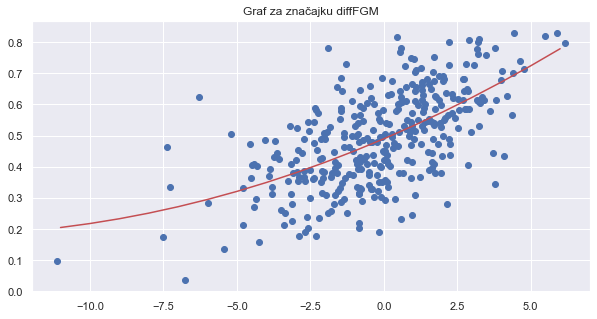

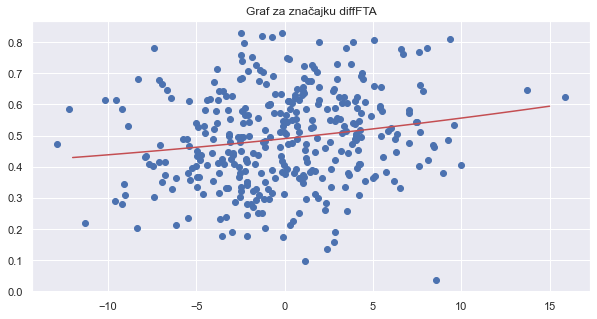

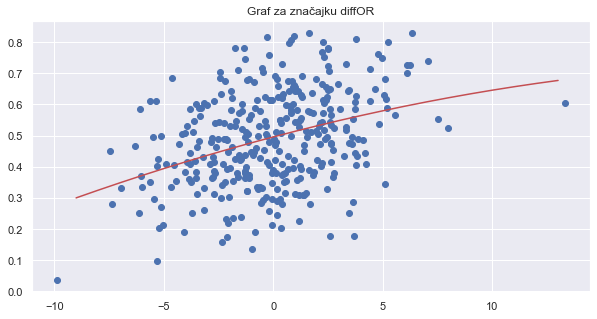

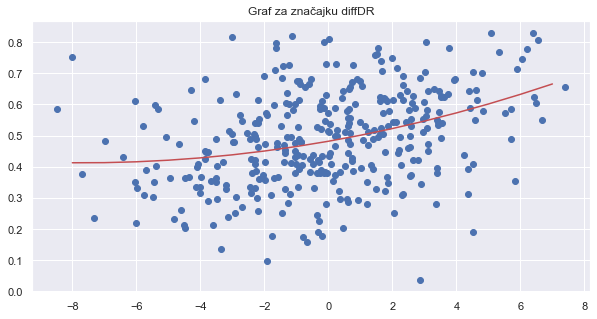

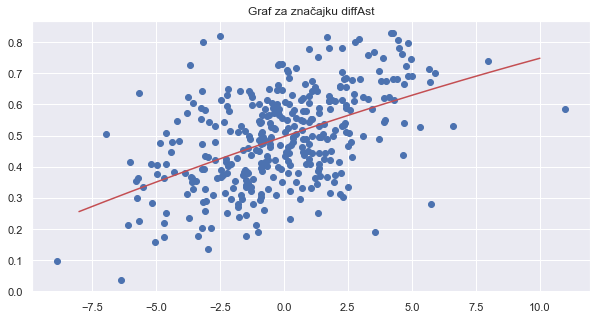

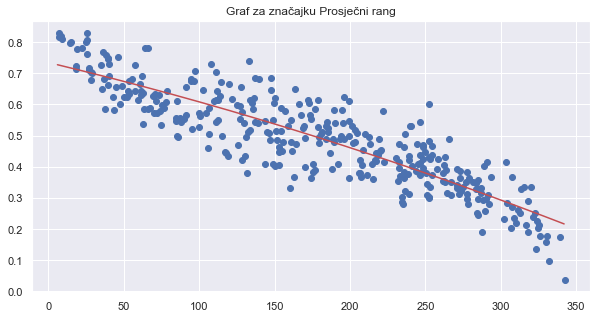

In [162]:
for i in range(len(x)):
    plt.scatter(x[i],y)
    t = "Graf za značajku " + str(six[i])
    pred = []
    minn = min(x[i])
    maxx = max(x[i])
    var = list(z for z in range(int(minn), int(maxx+1)))
    for z in var:
        h = w[i][0]*z*z + w[i][1]*z + w[i][2]
        pred.append(h)
    plt.plot(var, pred, color = 'r')
    plt.title(t)
    plt.show()

Iz grafova iznad jasno vidimo da su neke značajke više diskriminativne od drugih. Npr, vidimo da prosječni rang jako negativno korelira s postotkom pobjeda što je razumljivo. Momčadi s manjim rangom su bolje te očekivano imaju veći postotak pobjeda. Zatim, broj poena iz igre i broj asistencija također snažno koreliraju s postotkom pobjeda (naravno, pozitivno). Ostale tri značajke imaju raspršeniji graf i ne preveliku korelaciju s postotkom pobjeda (broj defanzivnih i ofanzivnih skokova te broj zarađenih slobodnih bacanja). Također, primijetio bih da su broj defanzivnih i ofanzivnih skokova slične značajke, te da bi možda bilo bolje uzeti samo jednu od te dvije značajke za analizu, te jednu zamijeniti s nekom drugom. Npr, diffDR sa značajkom diffTO koja nam govori o broju izgubljenih posjeda. No, uvjet zadatka je bio replicirati rezultate i uzeti 6 najdiskriminativnijih po iznosu te sam tako i napravio.